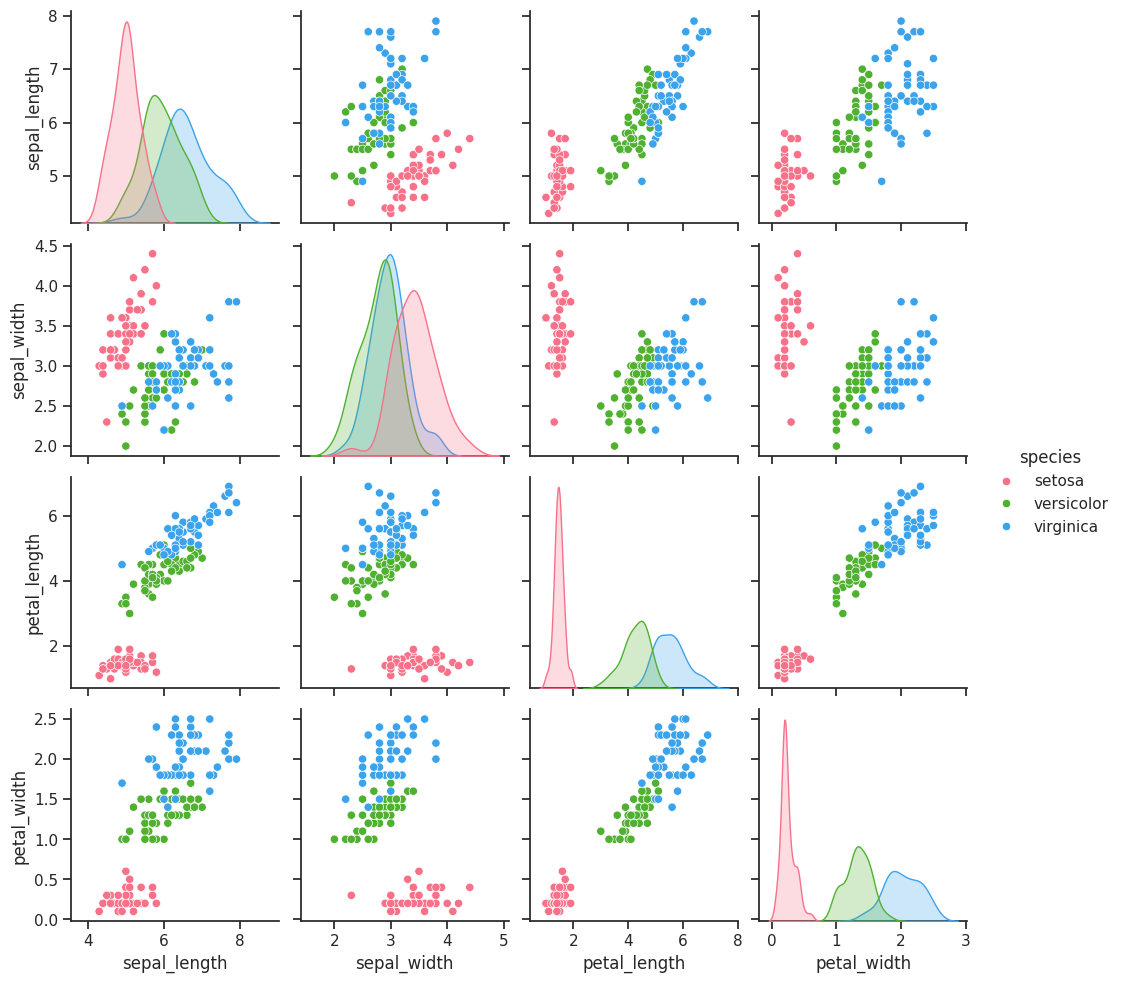

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 84ms/step - loss: 1.2806 - accuracy: 0.3750 - val_loss: 0.9253 - val_accuracy: 0.8000
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9481 - accuracy: 0.6333 - val_loss: 0.8475 - val_accuracy: 0.6333
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8208 - accuracy: 0.6917 - val_loss: 0.8251 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7653 - accuracy: 0.6917 - val_loss: 0.7947 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7112 - accuracy: 0.6917 - val_loss: 0.7317 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6601 - accuracy: 0.6917 - val_loss: 0.6570 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6138 - accuracy: 0.6917 - val_loss: 0.6052 - val_accuracy: 0.6000
Epoch 8/100
4/4 [===

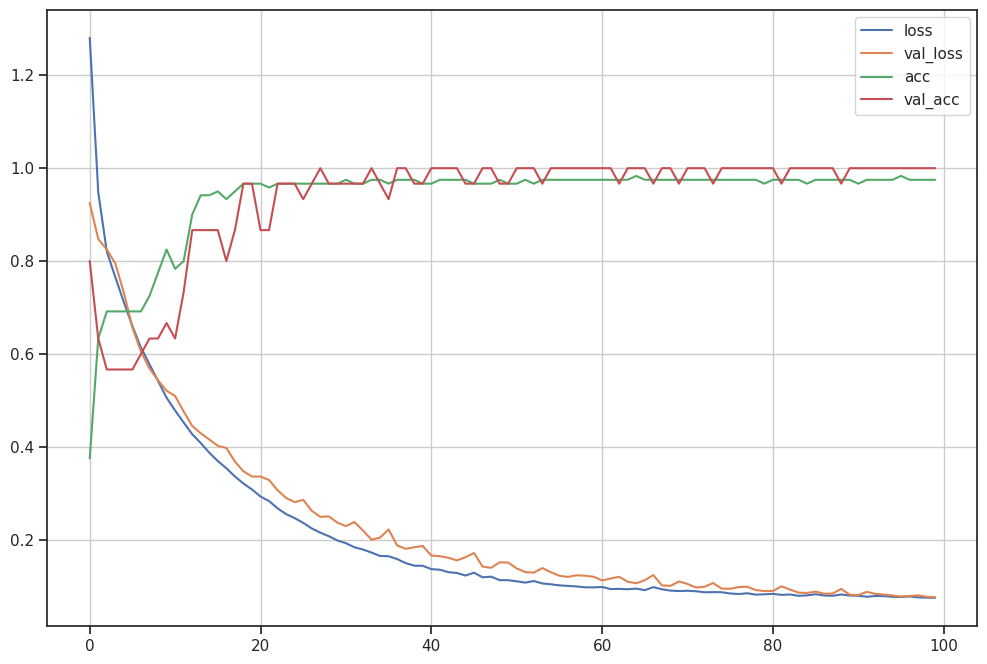

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 87ms/step - loss: 0.0765 - accuracy: 1.0000
Accuracy = 1.00


In [13]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

1/1 [==============================] - 0s 242ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [20]:
test_set = np.array([[5, 2.9, 1, 0.2]])
out=model.predict(test_set)
print(np.argmax(out))
print("Predicted target name: {}".format(iris['species'].unique()[np.argmax(out)]))
#print("Predicted target name: {}".format(
    #iris['species'].unique()[model.predict_classes(test_set)]))
#print("Predicted target name: {}".format(iris['species'].unique()[model.predict(test_set)]))

1/1 [==============================] - 0s 43ms/step
0
Predicted target name: setosa


In [21]:
test_set = np.array([[7, 3.0, 5, 1.4]])
out=model.predict(test_set)
print(np.argmax(out))
print("Predicted target name: {}".format(iris['species'].unique()[np.argmax(out)]))
#print("Predicted target name: {}".format(
    #iris['species'].unique()[model.predict_classes(test_set)]))
#print("Predicted target name: {}".format(iris['species'].unique()[model.predict(test_set)]))

1/1 [==============================] - 0s 29ms/step
1
Predicted target name: versicolor


In [22]:
model.save("test.ckpt")

In [ ]:
#모델 다시 로드해서 예측하기..